In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [30]:
admission = pd.read_csv('dataset_admissions.csv')

In [139]:
admission.head()

,admit,gre,gpa,rank,Admitted
0,0,380,3.61,3,NaN
1,1,660,3.67,3,NaN
2,1,800,4.00,1,NaN
3,1,640,3.19,4,NaN
4,0,520,2.93,4,NaN


In [141]:
admission.shape 

(400, 5)

In [97]:
admission.std()

admit         0.466087
gre         115.516536
gpa           0.380567
rank          0.944460
Admitted           NaN
dtype: float64

In [34]:
admission.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


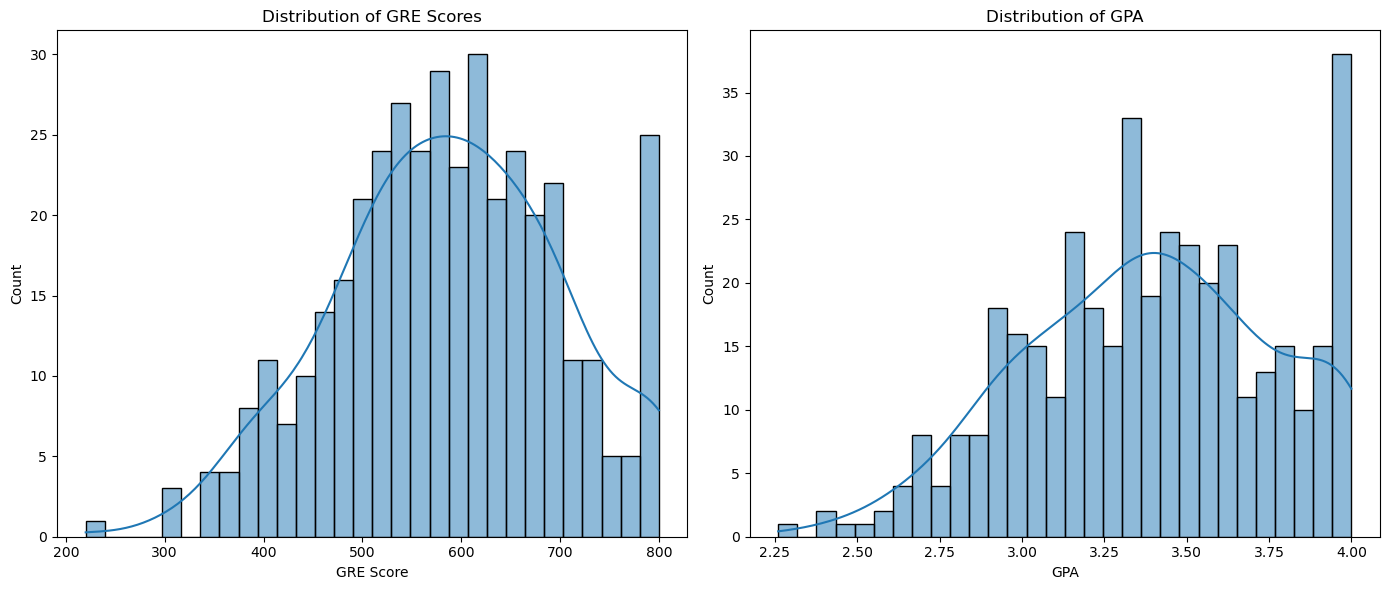

In [155]:
# Plot histograms for numerical features
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(admission['gre'], kde=True, bins=30)
plt.title('Distribution of GRE Scores')
plt.xlabel('GRE Score')

plt.subplot(1, 2, 2)
sns.histplot(admission['gpa'], kde=True, bins=30)
plt.title('Distribution of GPA')
plt.xlabel('GPA')

plt.tight_layout()
plt.show()


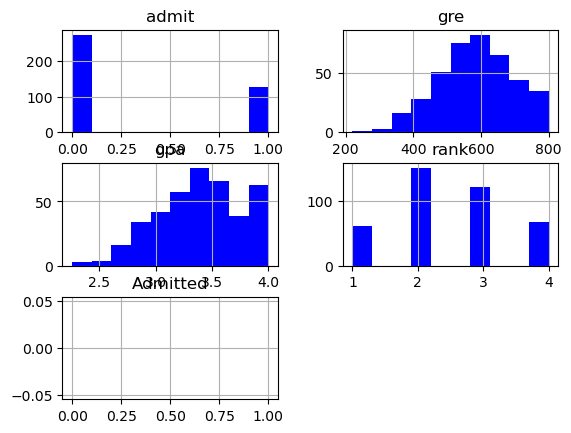

In [99]:
admission.hist(color="blue")
plt.show()

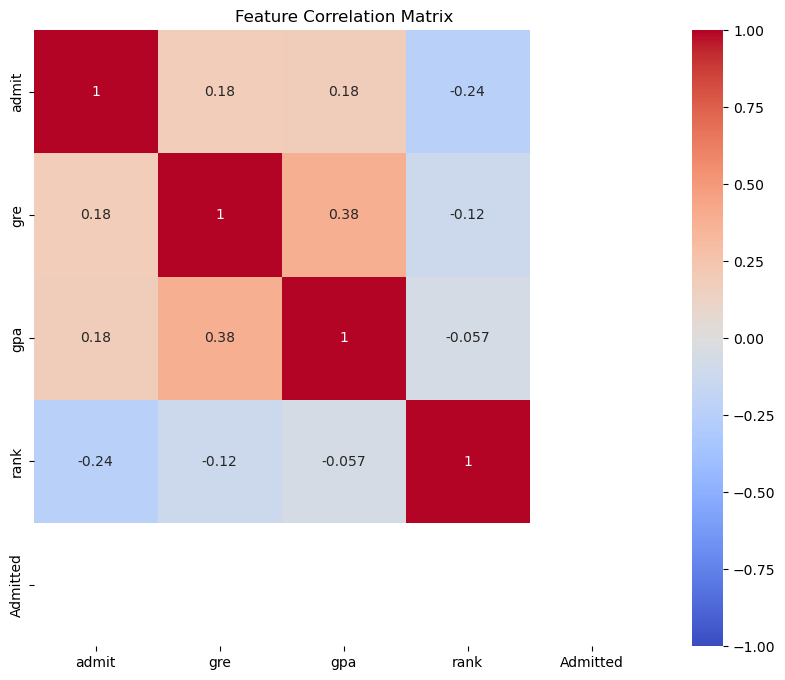

In [153]:
# Correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(admission.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


In [55]:
# Splitting the data into features and target
X = admission[['gre', 'gpa', 'rank']]
y = admission['admit']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
# Creating and training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [87]:
# Making predictions
y_pred = log_reg.predict(X_test)


In [105]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 67.50%
Confusion Matrix:
[[50  3]
 [23  4]]


In [107]:
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        53
           1       0.57      0.15      0.24        27

    accuracy                           0.68        80
   macro avg       0.63      0.55      0.51        80
weighted avg       0.65      0.68      0.61        80



<Axes: >

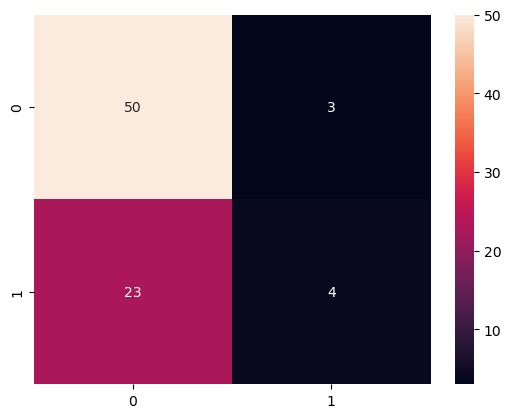

In [103]:
sns.heatmap(conf_matrix, annot=True)

In [145]:
# Compute the predictions using the existing model and weights (A_final)
prediction = predict_logistic(X_train, A_final)

# Convert probabilities to binary classifications
class_y = (prediction >= 0.5).astype(int)

# Calculate the number of misclassified examples
num_misclassified = np.sum(class_y != y_train)

# Calculate accuracy
accuracy = np.mean(class_y == y_train) * 100

# Print results
print(f"Number of misclassified examples: {num_misclassified}")
print(f"Prediction accuracy on the training data: {accuracy:.2f}%")


Number of misclassified examples: 127
Prediction accuracy on the training data: 60.31%


Feature Coefficients:
  Feature  Coefficient
0     gre     0.002384
1     gpa     0.701171
2    rank    -0.549881


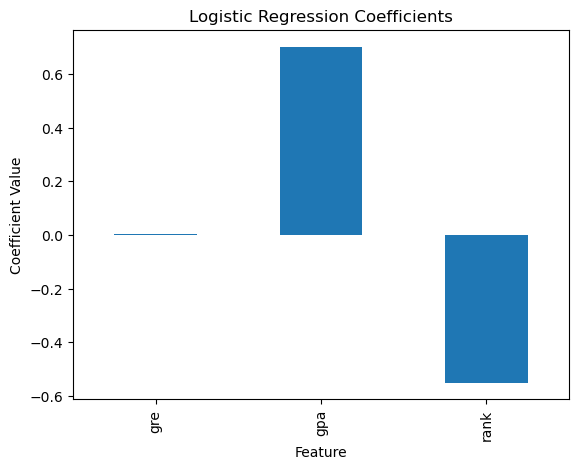

In [159]:
# Print coefficients
coefficients = pd.DataFrame({'Feature': ['gre', 'gpa', 'rank'], 'Coefficient': model.coef_[0]})
print("Feature Coefficients:")
print(coefficients)

# Visualize coefficients
coefficients.set_index('Feature').plot(kind='bar', legend=False)
plt.title('Logistic Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.show()
